In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eu-superstore-data/Superstore.xls


## Project Title: Enhancing Profit Margins for Superstore
   Introduction: In my capacity as a data analyst with expertise in Python, SQL, and data visualization tools like Tableau, I'm embarking on a mission to enhance profit margins for the Superstore dataset. This project is an opportunity to harness data-driven insights to drive profitability. The primary aim is to identify actionable strategies that can substantially boost Superstore's profitability.
Project Outline:
   #### 1. Data Exploration and Understanding:
•	Commencing with a thorough exploration of the Superstore dataset, I'll delve into its structure, features, and data quality.
•	My goal is to uncover historical sales and profit trends to lay a solid foundation for the analysis.
   #### 2. Customer Segmentation:
•	Leveraging RFM analysis, I intend to segment customers based on their purchasing behavior.
•	The objective here is to evaluate the profitability of each customer segment, allowing me to prioritize those with the highest profit potential.
   #### 3. Product Analysis:
•	I will scrutinize product categories and sub-categories to distinguish high-margin and low-margin products.
•	The aim is to pinpoint products that exert the most significant influence on profit and sales.
   #### 4. Pricing Strategy Optimization:
•	My analysis will encompass an examination of the impact of discounts on profit margins and sales.
•	Subsequently, I will formulate recommendations for optimal pricing strategies tailored to different product categories.
   #### 5. Supply Chain and Inventory Management:
•	To optimize profitability, I will assess inventory turnover rates and identify products with slow-moving inventory.
•	Strategies for improved inventory management will be proposed to reduce costs and minimize stockouts.
   #### 6. Geographical Analysis:
•	Geographical insights will be derived by analyzing sales and profit patterns across regions, cities, and states.
•	The objective is to identify regions with untapped growth potential and opportunities for cost reduction.
   #### 7. Data Visualization:
•	Utilizing my proficiency in Tableau, I'll craft compelling visualizations that effectively communicate key findings.
   #### 8. Recommendations and Action Plan:
•	Summarizing critical insights, I'll provide a concrete action plan to enhance profit margins.
•	My recommendations will be actionable and aligned with the Superstore's overarching goals


In [85]:
!pip install xlrd

In [86]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Overview of the Dataset: 
   ### The code starts by loading the dataset from an Excel file using the Pandas library and then displays the first 10 rows to provide an overview of the data.

In [87]:
# Load your dataset from an Excel file into a pandas DataFrame

data = pd.read_excel('/kaggle/input/eu-superstore-data/Superstore.xls', sheet_name='Orders', engine='xlrd')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [88]:
# SQL Query 1 - Overview of the Dataset
query1 = """
SELECT *
FROM data
LIMIT 10;
"""
result1 = ps.sqldf(query1, locals())

print("Query 1 - Overview of the Dataset\n")

result1

Query 1 - Overview of the Dataset



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,ES-2018-1311038,2018-02-07 00:00:00.000000,2018-02-11 00:00:00.000000,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60
1,2,ES-2018-1311038,2018-02-07 00:00:00.000000,2018-02-11 00:00:00.000000,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00
2,3,ES-2018-1311038,2018-02-07 00:00:00.000000,2018-02-11 00:00:00.000000,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11
3,4,ES-2018-1311038,2018-02-07 00:00:00.000000,2018-02-11 00:00:00.000000,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20
4,5,ES-2018-1311038,2018-02-07 00:00:00.000000,2018-02-11 00:00:00.000000,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71
5,6,ES-2018-1311038,2018-02-07 00:00:00.000000,2018-02-11 00:00:00.000000,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10002271,Office Supplies,Storage,"Rogers Shelving, Wire Frame",122.40,2,0.0,37.92
6,7,ES-2018-1311038,2018-02-07 00:00:00.000000,2018-02-11 00:00:00.000000,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-PH-10003963,Technology,Phones,"Apple Signal Booster, Full Size",413.82,3,0.0,20.61
7,8,ES-2016-5113958,2016-08-02 00:00:00.000000,2016-08-07 00:00:00.000000,Second Class,EB-13840,Ellis Ballard,Corporate,West Bromwich,England,United Kingdom,North,TEC-CO-10004325,Technology,Copiers,"Canon Personal Copier, Laser",428.22,3,0.0,192.69
8,9,ES-2016-5113958,2016-08-02 00:00:00.000000,2016-08-07 00:00:00.000000,Second Class,EB-13840,Ellis Ballard,Corporate,West Bromwich,England,United Kingdom,North,OFF-AP-10004512,Office Supplies,Appliances,"Hoover Stove, Red",3979.29,7,0.0,1989.54
9,10,ES-2016-5113958,2016-08-02 00:00:00.000000,2016-08-07 00:00:00.000000,Second Class,EB-13840,Ellis Ballard,Corporate,West Bromwich,England,United Kingdom,North,OFF-FA-10002393,Office Supplies,Fasteners,"Accos Push Pins, Bulk Pack",43.56,3,0.0,12.60


## Data Quality Checks:
*    ### Query 2 checks for missing values in various columns.
*    ### Query 3 identifies rows with negative values in sales, quantity, discount, or profit.
*    ### Rows with negative values are replaced with their absolute values.

In [89]:
# SQL Query 2 - Data Quality Check - Missing Values
query2 = """
SELECT
  COUNT(*) AS total_rows,
  SUM(CASE WHEN "Order ID" IS NULL THEN 1 ELSE 0 END) AS missing_order_id,
  SUM(CASE WHEN "Order Date" IS NULL THEN 1 ELSE 0 END) AS missing_order_date,
  SUM(CASE WHEN "Ship Date" IS NULL THEN 1 ELSE 0 END) AS missing_ship_date,
  SUM(CASE WHEN "Ship Mode" IS NULL THEN 1 ELSE 0 END) AS missing_ship_mode,
  SUM(CASE WHEN "Customer ID" IS NULL THEN 1 ELSE 0 END) AS missing_customer_id,
  SUM(CASE WHEN "Customer Name" IS NULL THEN 1 ELSE 0 END) AS missing_customer_name,
  SUM(CASE WHEN "Segment" IS NULL THEN 1 ELSE 0 END) AS missing_segment,
  SUM(CASE WHEN "City" IS NULL THEN 1 ELSE 0 END) AS missing_city,
  SUM(CASE WHEN "State" IS NULL THEN 1 ELSE 0 END) AS missing_state,
  SUM(CASE WHEN "Country" IS NULL THEN 1 ELSE 0 END) AS missing_country,
  SUM(CASE WHEN "Region" IS NULL THEN 1 ELSE 0 END) AS missing_region,
  SUM(CASE WHEN "Product ID" IS NULL THEN 1 ELSE 0 END) AS missing_product_id,
  SUM(CASE WHEN "Category" IS NULL THEN 1 ELSE 0 END) AS missing_category,
  SUM(CASE WHEN "Sub-Category" IS NULL THEN 1 ELSE 0 END) AS missing_sub_category,
  SUM(CASE WHEN "Product Name" IS NULL THEN 1 ELSE 0 END) AS missing_product_name,
  SUM(CASE WHEN "Sales" IS NULL THEN 1 ELSE 0 END) AS missing_sales,
  SUM(CASE WHEN "Quantity" IS NULL THEN 1 ELSE 0 END) AS missing_quantity,
  SUM(CASE WHEN "Discount" IS NULL THEN 1 ELSE 0 END) AS missing_discount,
  SUM(CASE WHEN "Profit" IS NULL THEN 1 ELSE 0 END) AS missing_profit
FROM data;
"""

result2 = ps.sqldf(query2, locals())

print("\nQuery 2 - Data Quality Check - Missing Values\n")

result2



Query 2 - Data Quality Check - Missing Values



,total_rows,missing_order_id,missing_order_date,missing_ship_date,missing_ship_mode,missing_customer_id,missing_customer_name,missing_segment,missing_city,missing_state,missing_country,missing_region,missing_product_id,missing_category,missing_sub_category,missing_product_name,missing_sales,missing_quantity,missing_discount,missing_profit
0,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Quality Check - Negative Values

In [90]:
# SQL Query 3 - Data Quality Check - Negative Values
query3 = """
SELECT Sales, Quantity, Discount, Profit
FROM data
WHERE Sales < 0 OR Quantity < 0 OR Discount < 0 OR Profit < 0;
"""
result3 = ps.sqldf(query3, locals())

print("\nQuery 3 - Data Quality Check - Negative Values\n")

result3


Query 3 - Data Quality Check - Negative Values



,Sales,Quantity,Discount,Profit
0,138.105,5,0.1,-12.345
1,36.720,1,0.4,-5.520
2,279.720,5,0.1,-6.330
3,110.025,5,0.1,-12.225
4,15.000,1,0.5,-9.300
...,...,...,...,...
2113,9.045,3,0.5,-3.465
2114,167.805,11,0.5,-23.595
2115,321.000,5,0.5,-141.300
2116,571.374,3,0.1,-19.116


## Replacing Rows with Negative Values

In [91]:
# Apply .abs() to columns with potential negative values
data['Sales'] = data['Sales'].abs()
data['Quantity'] = data['Quantity'].abs()
data['Discount'] = data['Discount'].abs()
data['Profit'] = data['Profit'].abs()

# Define the path for saving the result after replacing negative values
result_path = '/kaggle/working/result_after_replacing_negatives.csv'

# Save the entire cleaned DataFrame to a CSV file
data.to_csv(result_path, index=False)

df = pd.read_csv('/kaggle/working/result_after_replacing_negatives.csv')

# Query for rows with negative values
query4 = """
SELECT Sales, Quantity, Discount, Profit
FROM df
WHERE Sales < 0 OR Quantity < 0 OR Discount < 0 OR Profit < 0;
"""
result4 = ps.sqldf(query4, locals())

# Print the result
result4

,Sales,Quantity,Discount,Profit


## Summary Statistics: 
   ### Query 5 calculates summary statistics such as the total number of rows, average sales, average profit, maximum sales, maximum profit, minimum sales, and minimum profit.

In [92]:
# SQL Query 5 - Summary Statistics
query5 = """
SELECT
  COUNT(*) AS total_rows,
  AVG(Sales) AS avg_sales,
  AVG(Profit) AS avg_profit,
  MAX(Sales) AS max_sales,
  MAX(Profit) AS max_profit,
  MIN(Sales) AS min_sales,
  MIN(Profit) AS min_profit
FROM df;
"""
result5 = ps.sqldf(query5, locals())

print("\nQuery 5 - Summary Statistics\n")

result5


Query 5 - Summary Statistics



,total_rows,avg_sales,avg_profit,max_sales,max_profit,min_sales,min_profit
0,10000,293.808906,74.520773,7958.58,3979.08,2.955,0.0


## Customer Segmentation (RFM Analysis):

* ### Query 6 identifies the last order date for each customer.
* ### Query 7 calculates the total number of orders and total sales for each customer.

In [128]:
# SQL Query 6 - Customer Segmentation (RFM Analysis) - last_order_date
query6 = """
SELECT
  "Customer ID",
  "Customer Name",
  MAX("Order Date") AS last_order_date
FROM df
GROUP BY "Customer ID", "Customer Name";
"""
result6 = ps.sqldf(query6, locals())

print("\nQuery 6 - Customer Segmentation (RFM Analysis) - last_order_date\n")

result6


Query 6 - Customer Segmentation (RFM Analysis) - last_order_date



,Customer ID,Customer Name,last_order_date
0,AA-10315,Alex Avila,2018-12-18
1,AA-10375,Allen Armold,2018-02-17
2,AA-10480,Andrew Allen,2018-05-16
3,AA-10645,Anna Andreadi,2018-05-12
4,AB-10015,Aaron Bergman,2018-04-23
...,...,...,...
790,XP-21865,Xylona Preis,2018-05-01
791,YC-21895,Yoseph Carroll,2018-11-18
792,YS-21880,Yana Sorensen,2018-06-17
793,ZC-21910,Zuschuss Carroll,2018-12-28


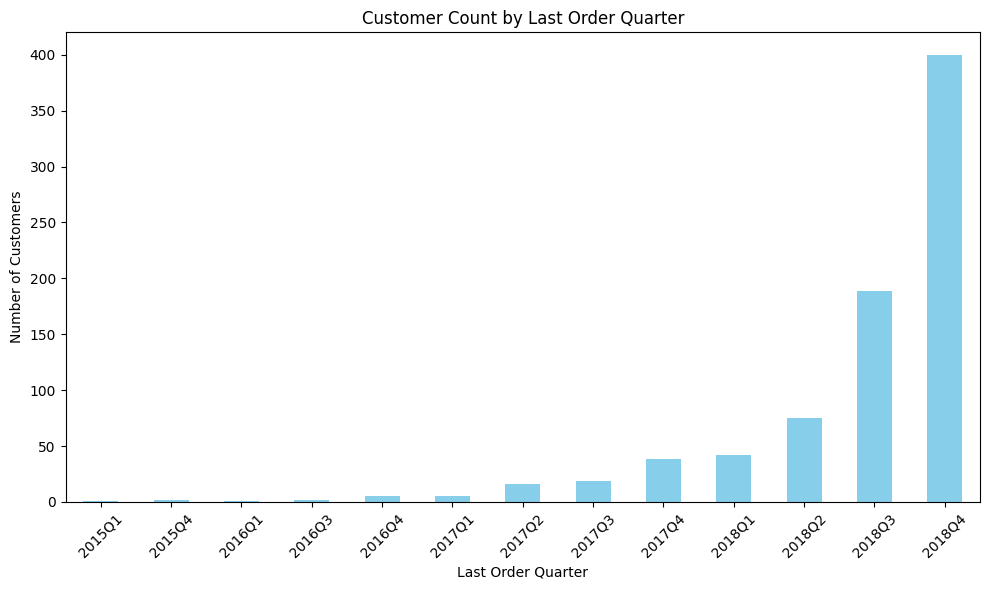

In [94]:
# Convert 'last_order_date' to datetime
result6['last_order_date'] = pd.to_datetime(result6['last_order_date'])

# Create a new column 'last_order_quarter' by extracting the quarter and year
result6['last_order_quarter'] = result6['last_order_date'].dt.to_period('Q')

# Group by last_order_quarter and count customers
quarterly_customer_count = result6.groupby('last_order_quarter').size()

plt.figure(figsize=(10, 6))
quarterly_customer_count.plot(kind='bar', color='skyblue')
plt.xlabel('Last Order Quarter')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Last Order Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Customer Segmentation (RFM Analysis) - Frequency and Monetary Value

In [130]:
# SQL Query 7 - Customer Segmentation (RFM Analysis) - Frequency and Monetary Value
query7 = """
SELECT
  "Customer ID",
  "Customer Name",
  COUNT(DISTINCT "Order ID") AS total_orders,
  SUM(Sales) AS total_sales
FROM df
GROUP BY "Customer ID", "Customer Name";
"""
result7 = ps.sqldf(query7, locals())

print("\nQuery 7 - Customer Segmentation (RFM Analysis) - Frequency and Monetary Value\n")

result7


Query 7 - Customer Segmentation (RFM Analysis) - Frequency and Monetary Value



,Customer ID,Customer Name,total_orders,total_sales
0,AA-10315,Alex Avila,7,6105.6270
1,AA-10375,Allen Armold,3,560.0820
2,AA-10480,Andrew Allen,7,5254.4565
3,AA-10645,Anna Andreadi,9,2730.2070
4,AB-10015,Aaron Bergman,12,6116.4540
...,...,...,...,...
790,XP-21865,Xylona Preis,4,2113.4580
791,YC-21895,Yoseph Carroll,14,8530.9185
792,YS-21880,Yana Sorensen,6,3864.0600
793,ZC-21910,Zuschuss Carroll,11,11853.0690


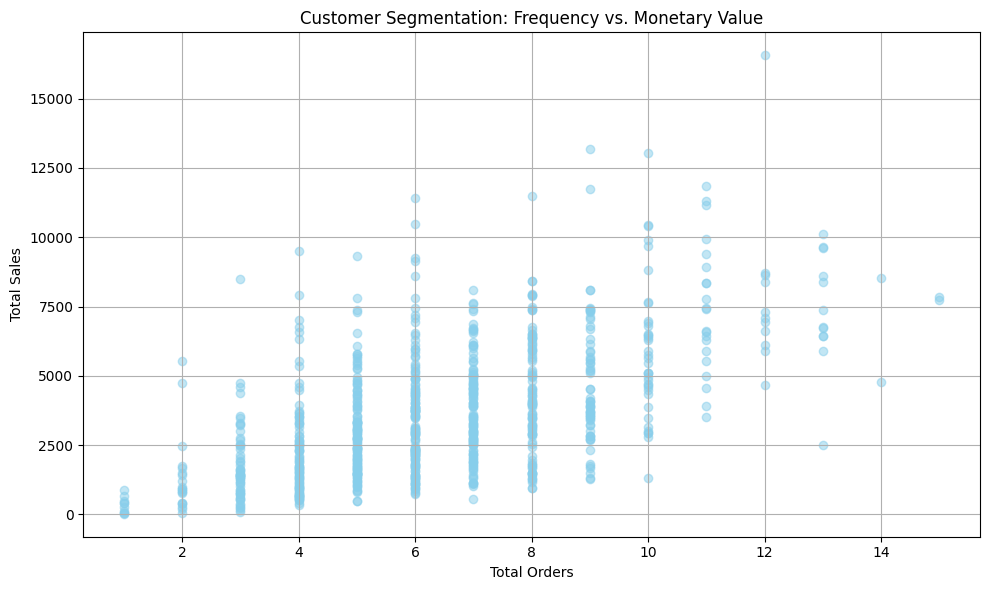

In [96]:
# Extract data from the result DataFrame
total_orders = result7['total_orders']
total_sales = result7['total_sales']

plt.figure(figsize=(10, 6))
plt.scatter(total_orders, total_sales, color='skyblue', alpha=0.5)
plt.xlabel('Total Orders')
plt.ylabel('Total Sales')
plt.title('Customer Segmentation: Frequency vs. Monetary Value')
plt.grid(True)
plt.tight_layout()
plt.show()

## Product Analysis:

* ### Query 8 analyzes high-margin products by category and sub-category.
* ### Query 9 provides sales by category and sub-category.

In [97]:
# SQL Query 8 - Product Analysis - High Margin Products
query8 = """
SELECT
  "Category",
  "Sub-Category",
  AVG(Profit) AS avg_profit
FROM df
GROUP BY "Category", "Sub-Category"
ORDER BY avg_profit DESC;
"""
result8 = ps.sqldf(query8, locals())

print("\nQuery 8 - Product Analysis - High Margin Products\n")

result8


Query 8 - Product Analysis - High Margin Products



,Category,Sub-Category,avg_profit
0,Furniture,Tables,432.290885
1,Office Supplies,Appliances,227.644760
2,Technology,Copiers,193.123394
3,Furniture,Bookcases,192.459886
4,Technology,Phones,150.836621
5,Furniture,Chairs,130.575232
6,Technology,Machines,113.495362
7,Technology,Accessories,102.942710
8,Office Supplies,Storage,57.937339
9,Furniture,Furnishings,45.999143


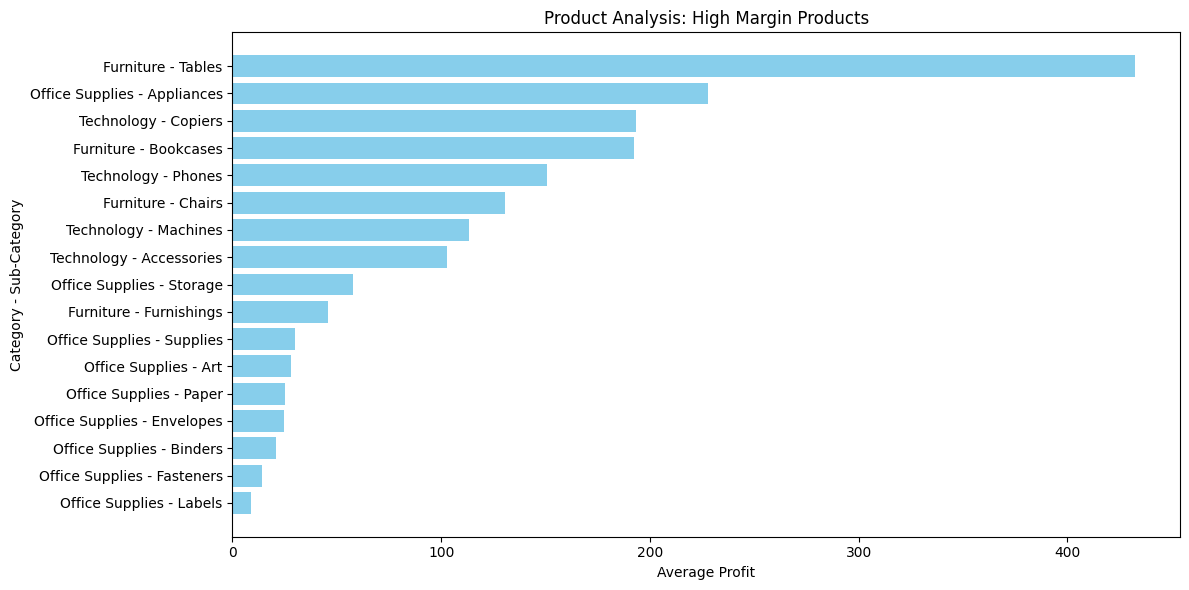

In [98]:
# Extract data from the result DataFrame
categories = result8['Category'] + " - " + result8['Sub-Category']
avg_profit = result8['avg_profit']

plt.figure(figsize=(12, 6))
plt.barh(categories, avg_profit, color='skyblue')
plt.xlabel('Average Profit')
plt.ylabel('Category - Sub-Category')
plt.title('Product Analysis: High Margin Products')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.tight_layout()
plt.show()

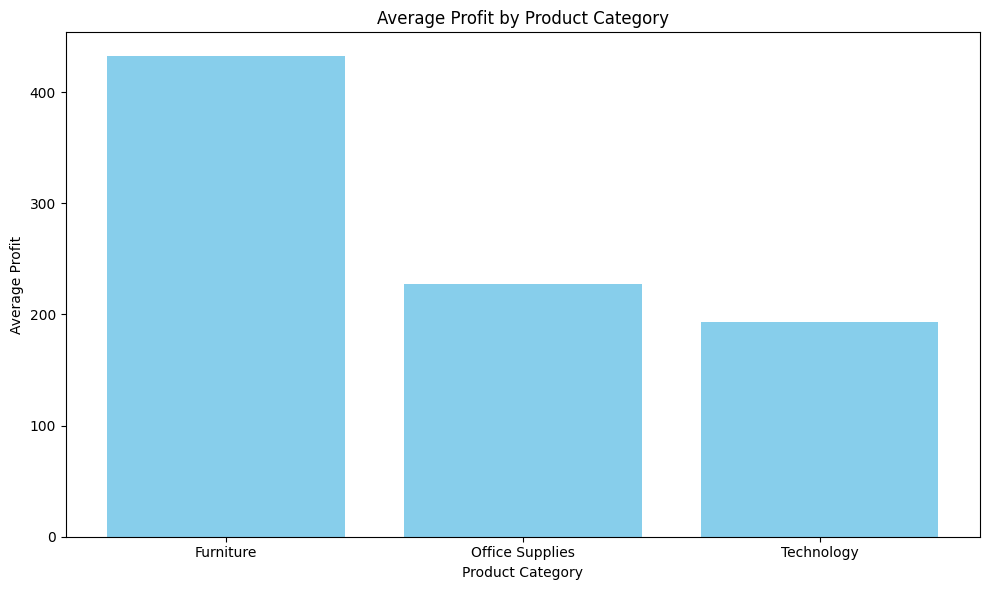

In [99]:

# Data
categories = result8['Category']
avg_profit = result8['avg_profit']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, avg_profit, color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Average Profit')
plt.title('Average Profit by Product Category')
plt.xticks()
plt.tight_layout()

# Show the plot
plt.show()


In [100]:
# SQL Query 9 - Sales by Category and Sub-Category
query9 = """
SELECT
  "Category",
  "Sub-Category",
  SUM(Sales) AS total_sales
FROM df
GROUP BY "Category", "Sub-Category"
ORDER BY "Category", total_sales DESC;
"""
result9 = ps.sqldf(query9, locals())

print("\nQuery 9 - Sales by Category and Sub-Category\n")

result9


Query 9 - Sales by Category and Sub-Category



,Category,Sub-Category,total_sales
0,Furniture,Bookcases,363525.6990
1,Furniture,Chairs,228980.9670
2,Furniture,Tables,105381.3765
3,Furniture,Furnishings,81215.0070
4,Office Supplies,Storage,339684.2670
5,Office Supplies,Appliances,275439.1830
6,Office Supplies,Art,160088.1840
7,Office Supplies,Binders,99762.6900
8,Office Supplies,Supplies,52782.7530
9,Office Supplies,Paper,42450.8610


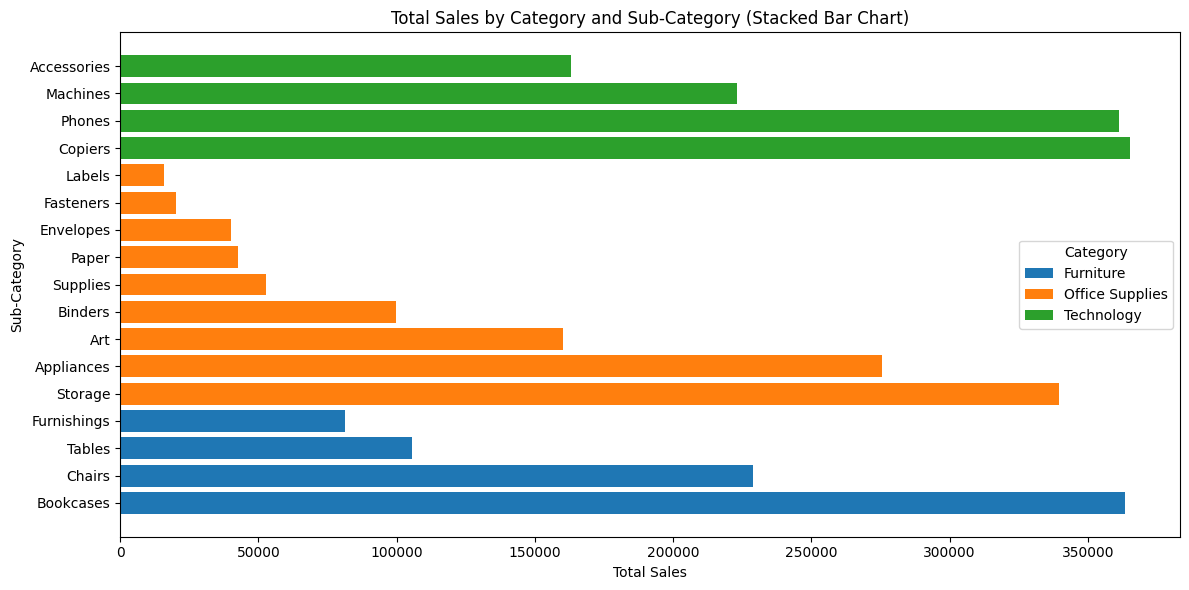

In [101]:
# Data
categories = result9['Category'].unique()
subcategories = result9['Sub-Category'].unique()
total_sales = result9['total_sales']

# Create a dictionary to store sales by sub-category for each category
category_sales = {cat: [] for cat in categories}

# Populate the dictionary
for cat in categories:
    for subcat in subcategories:
        subcat_sales = result9[(result9['Category'] == cat) & (result9['Sub-Category'] == subcat)]['total_sales']
        if not subcat_sales.empty:
            category_sales[cat].append(subcat_sales.iloc[0])
        else:
            category_sales[cat].append(0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
bottom = None
for cat in categories:
    plt.barh(subcategories, category_sales[cat], label=cat, left=bottom)
    bottom = category_sales[cat] if bottom is None else [bottom[i] + category_sales[cat][i] for i in range(len(bottom))]

# Set labels, title, and legend
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.title('Total Sales by Category and Sub-Category (Stacked Bar Chart)')
plt.legend(title='Category')

# Show the plot
plt.tight_layout()
plt.show()

## Time Series Analysis:

   ### Query 10 performs a time series analysis, grouping sales and profit by month and year.

In [102]:
# SQL Query 10 - Time Series Analysis
query10 = """
SELECT
  strftime('%Y-%m', "Order Date") AS order_month,
  SUM(Sales) AS total_sales,
  SUM(Profit) AS total_profit
FROM df
GROUP BY order_month
ORDER BY order_month;
"""
result10 = ps.sqldf(query10, locals())

print("\nQuery 10 - Time Series Analysis\n")

result10


Query 10 - Time Series Analysis



,order_month,total_sales,total_profit
0,2015-01,18603.7125,5137.9005
1,2015-02,22635.9075,7125.1515
2,2015-03,17926.0350,4602.8010
3,2015-04,30133.1250,6319.3320
4,2015-05,30502.1685,7523.6895
5,2015-06,54356.2995,13489.2765
6,2015-07,18318.9570,3814.8090
7,2015-08,55139.1405,13398.1785
8,2015-09,72665.3310,17186.0520
9,2015-10,20800.0800,4952.7540


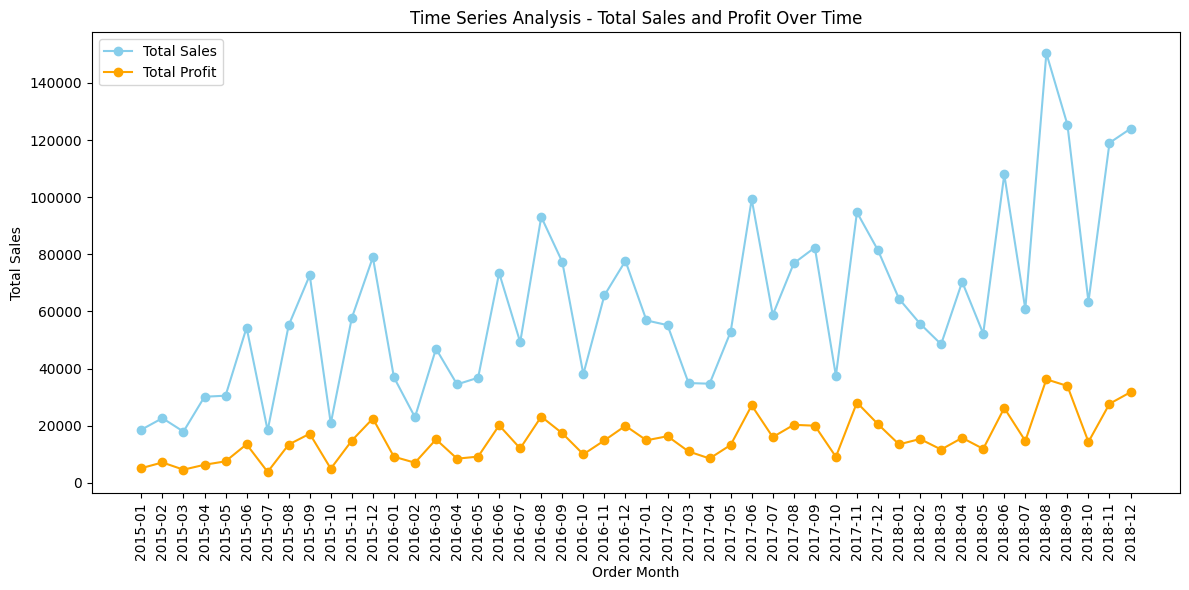

In [103]:
# Data
order_month = result10['order_month']
total_sales = result10['total_sales']
total_profit = result10['total_profit']

# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Plot total sales
ax.plot(order_month, total_sales, label='Total Sales', marker='o', color='skyblue')
ax.set_xlabel('Order Month')
ax.set_ylabel('Total Sales')
ax.set_title('Time Series Analysis - Total Sales and Profit Over Time')

# Plot total profit
ax.plot(order_month, total_profit, label='Total Profit', marker='o', color='orange')

# Add legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


## Customer Behavior Analysis:

* ### Query 12 analyzes customer behavior by counting the total orders and identifying the last purchase date for each customer.
* ### Query 13 evaluates customer loyalty based on the total number of orders and total profit for each customer.
* ### Query 14 lists the top 10 customers by total sales.

In [104]:
# SQL Query 12 - Customer Behavior Analysis
query12 = """
SELECT
  "Customer ID",
  "Customer Name",
  COUNT(DISTINCT "Order ID") AS total_orders,
  MAX("Order Date") AS last_purchase_date
FROM df
GROUP BY "Customer ID","Customer Name"
ORDER BY last_purchase_date DESC;
"""
result12 = ps.sqldf(query12, locals())

print("\nQuery 12 - Customer Behavior Analysis\n")

result12


Query 12 - Customer Behavior Analysis



,Customer ID,Customer Name,total_orders,last_purchase_date
0,DP-13390,Dennis Pardue,6,2018-12-31
1,ES-14020,Erica Smith,11,2018-12-31
2,JG-15805,John Grady,15,2018-12-31
3,JK-15640,Jim Kriz,5,2018-12-31
4,RD-19480,Rick Duston,7,2018-12-31
...,...,...,...,...
790,RD-19810,Ross DeVincentis,5,2016-07-03
791,BT-11680,Brian Thompson,2,2016-03-03
792,KN-16705,Kristina Nunn,3,2015-12-16
793,RD-19930,Russell D'Ascenzo,2,2015-11-11


In [105]:
# Define the bin edges and labels for the three groups
bin_edges = [0, 6, 11, 16]  
bin_labels = ['Low Orders (0-5)', 'Medium Orders (6-10)', 'High Orders (11-15)']


# Add a new column 'Order Group' to categorize customers
result12['Order Group'] = pd.cut(result12['total_orders'], bins=bin_edges, labels=bin_labels, right=False)

result12.head(3)


,Customer ID,Customer Name,total_orders,last_purchase_date,Order Group
0,DP-13390,Dennis Pardue,6,2018-12-31,Medium Orders (6-10)
1,ES-14020,Erica Smith,11,2018-12-31,High Orders (11-15)
2,JG-15805,John Grady,15,2018-12-31,High Orders (11-15)


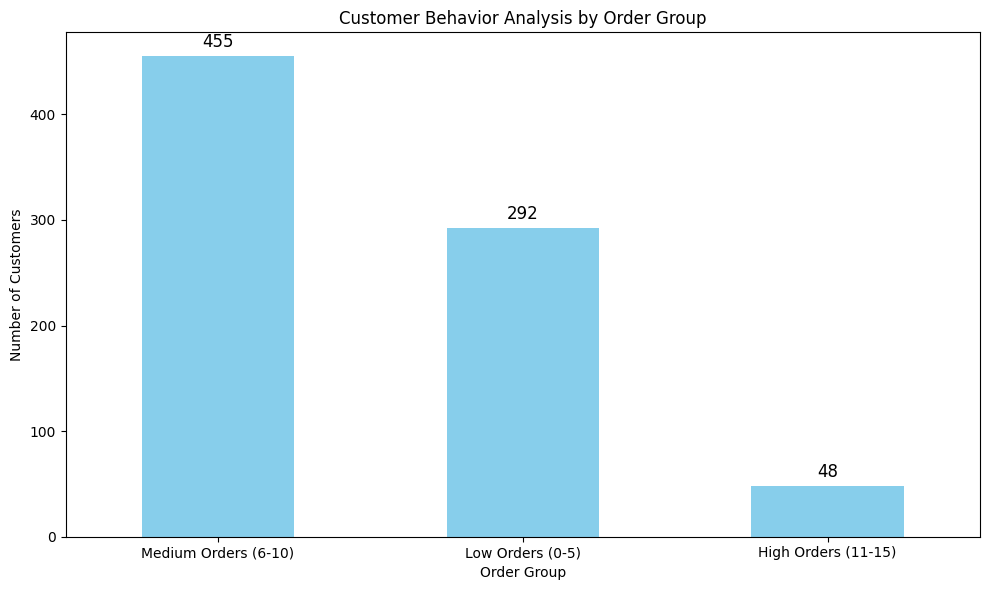

In [106]:
# Count the number of customers in each group
order_group_counts = result12['Order Group'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
order_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Order Group')
plt.ylabel('Number of Customers')
plt.title('Customer Behavior Analysis by Order Group')
plt.xticks(rotation=0)  # Remove rotation of x-axis labels

# Annotate the bars with the counts
for i, count in enumerate(order_group_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [107]:
# SQL Query 13 - Customer Loyalty Analysis
query13 = """
SELECT
  "Customer ID",
  "Customer Name",
  COUNT(DISTINCT "Order ID") AS total_orders,
  SUM(Profit) AS total_profit
FROM df
GROUP BY "Customer ID", "Customer Name"
ORDER BY total_profit DESC
LIMIT 15;
"""
result13 = ps.sqldf(query13, locals())

print("\nQuery 13 - Customer Loyalty Analysis\n")

result13


Query 13 - Customer Loyalty Analysis



,Customer ID,Customer Name,total_orders,total_profit
0,SP-20920,Susan Pistek,12,4998.9630
1,SS-20140,Saphhira Shifley,5,4341.1380
2,PJ-18835,Patrick Jones,3,4185.7560
3,PO-18865,Patrick O'Donnell,10,3827.8170
4,ZC-21910,Zuschuss Carroll,11,3716.5830
5,GZ-14470,Gary Zandusky,8,3620.3175
6,EB-13840,Ellis Ballard,10,3518.5800
7,DL-13315,Delfina Latchford,9,3515.7285
8,MG-18145,Mike Gockenbach,4,3507.2760
9,DP-13000,Darren Powers,10,3329.2440


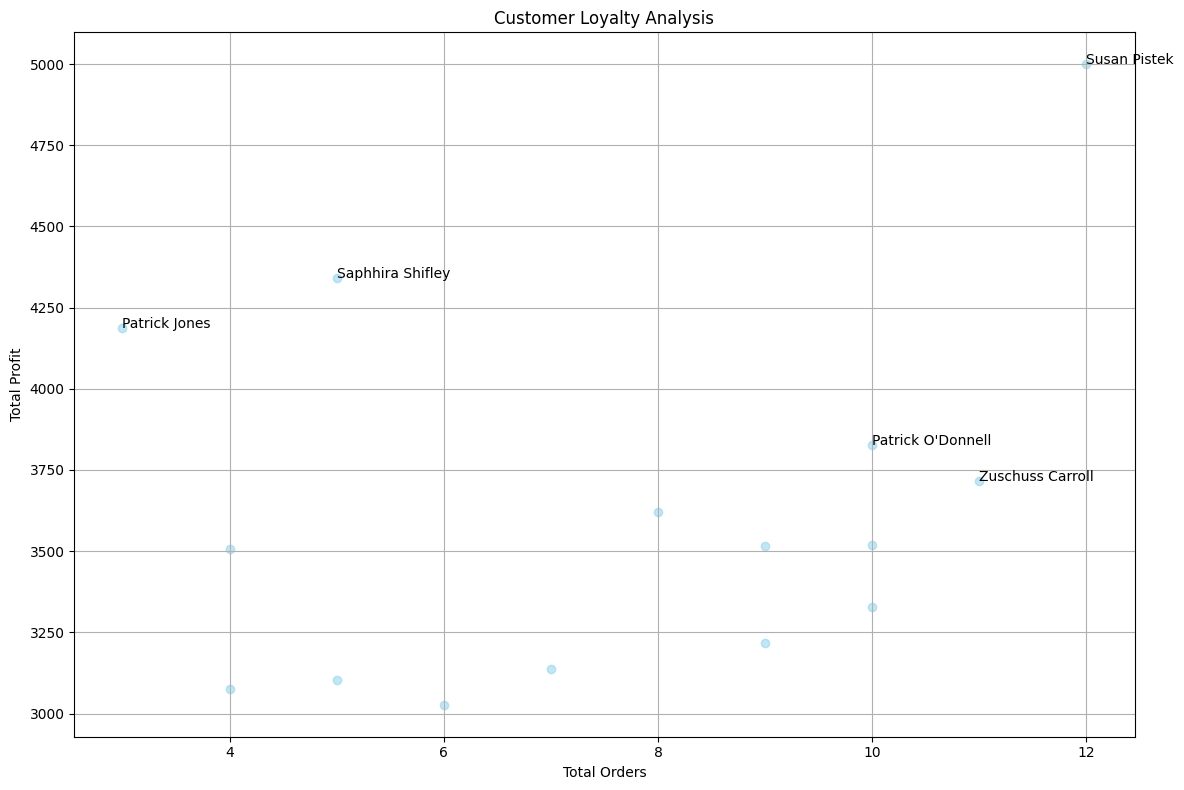

In [108]:
# Data
total_orders = result13['total_orders']
total_profit = result13['total_profit']
customer_names = result13['Customer Name']

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(total_orders, total_profit, color='skyblue', alpha=0.5)
plt.xlabel('Total Orders')
plt.ylabel('Total Profit')
plt.title('Customer Loyalty Analysis')

# Add labels for a subset of customer names to avoid overcrowding
show_labels = 5  # Change this value to control how many labels you want to display
for i in range(show_labels):
    plt.annotate(customer_names.iloc[i], (total_orders.iloc[i], total_profit.iloc[i]), fontsize=10)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [109]:
# SQL Query 14 - Top N Customers by Sales
query14 = """
SELECT
  "Customer ID",
  "Customer Name",
  SUM(Sales) AS total_sales
FROM df
GROUP BY "Customer ID", "Customer Name"
ORDER BY total_sales DESC
LIMIT 10;
"""
result14 = ps.sqldf(query14, locals())

print("\nQuery 14 - Top N Customers by Sales\n")

result14


Query 14 - Top N Customers by Sales



,Customer ID,Customer Name,total_sales
0,SP-20920,Susan Pistek,16564.1430
1,DL-13315,Delfina Latchford,13192.7145
2,PO-18865,Patrick O'Donnell,13056.2970
3,ZC-21910,Zuschuss Carroll,11853.0690
4,JH-15820,John Huston,11727.2925
5,MR-17545,Mathew Reese,11500.3755
6,GT-14710,Greg Tran,11429.5080
7,CM-11830,Cari MacIntyre,11302.1535
8,DJ-13420,Denny Joy,11159.4420
9,HG-14845,Harry Greene,10466.7645


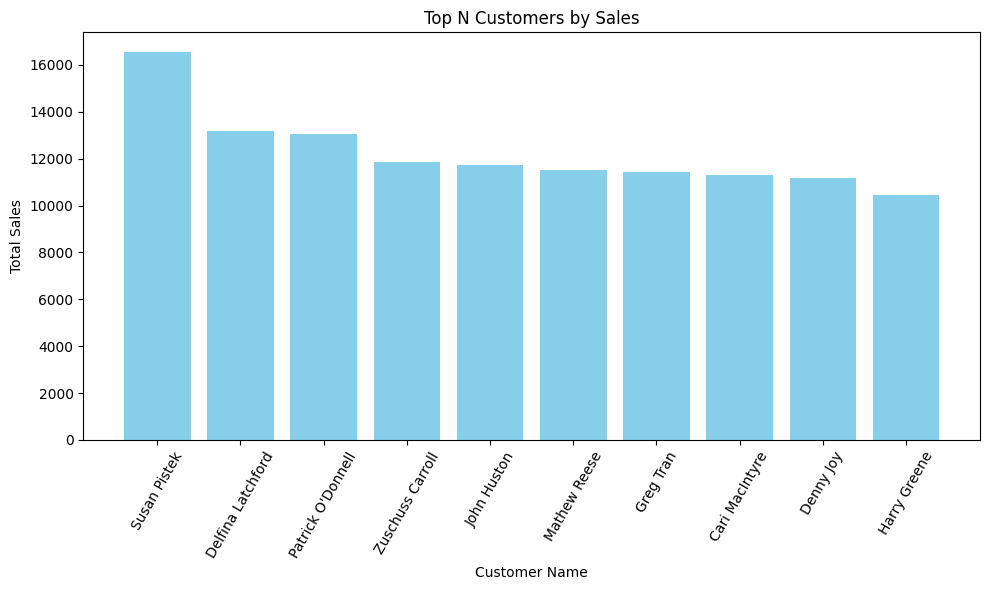

In [110]:
# Data
customers = result14['Customer Name']
total_sales = result14['total_sales']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(customers, total_sales, color='skyblue')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.title('Top N Customers by Sales')
plt.xticks(rotation=60)
plt.tight_layout()

# Show the plot
plt.show()

## Pricing Strategy Optimization
* ### Query 15 examines the effect of different discount levels on profit margins. It calculates the average profit for each discount percentage and presents the results in ascending order of discount. This analysis can help in making decisions regarding discount strategies and their impact on overall profitability.
* ### Query 16 focuses on understanding the average discount offered to customers in different segments. It calculates the average discount for each customer segment, which could be useful in tailoring marketing and pricing strategies for specific customer groups.

In [111]:
# SQL Query 15 - Impact of Discounts on Profit Margins
query15 = """
SELECT
  "Discount",
  AVG(Profit) AS avg_profit
FROM df
GROUP BY "Discount"
ORDER BY "Discount";
"""
result15 = ps.sqldf(query15, locals())

print("\nQuery 15 - Impact of Discounts on Profit Margins\n")

result15


Query 15 - Impact of Discounts on Profit Margins



,Discount,avg_profit
0,0.00,62.570351
1,0.10,82.640092
2,0.15,95.991881
3,0.20,59.414544
4,0.30,22.128647
5,0.35,291.858267
6,0.40,86.121285
7,0.45,551.595750
8,0.50,89.474181
9,0.60,176.874621


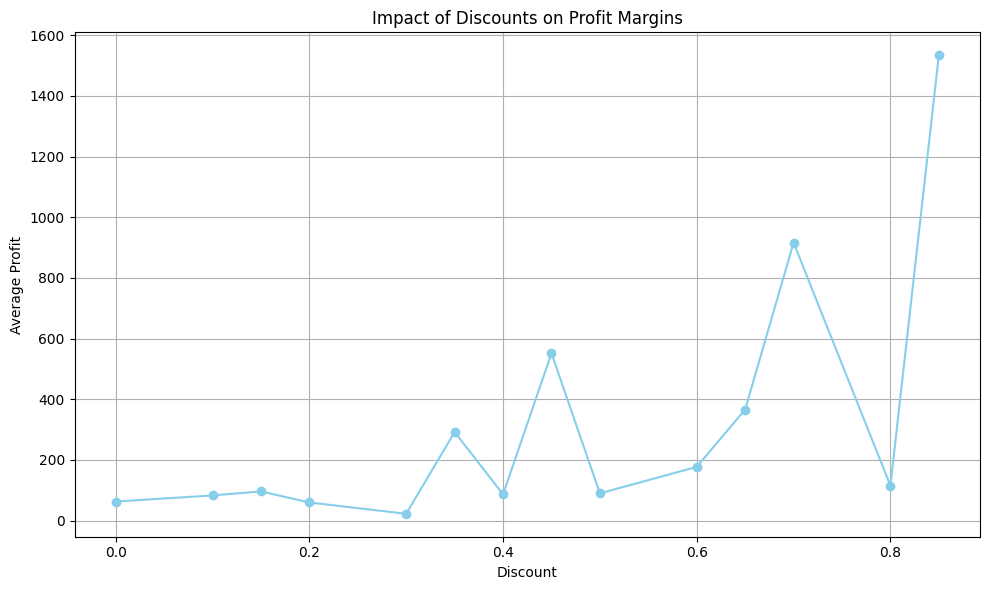

In [112]:
# Data
discounts = result15['Discount']
avg_profit = result15['avg_profit']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(discounts, avg_profit, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.title('Impact of Discounts on Profit Margins')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [113]:
# SQL Query 16 - Average Discount by Segment
query16 = """
SELECT
  "Segment",
  AVG(Discount) AS avg_discount
FROM df
GROUP BY "Segment";
"""
result16 = ps.sqldf(query16, locals())

print("\nQuery 16 - Average Discount by Segment\n")

result16


Query 16 - Average Discount by Segment



,Segment,avg_discount
0,Consumer,0.107212
1,Corporate,0.099480
2,Home Office,0.097265


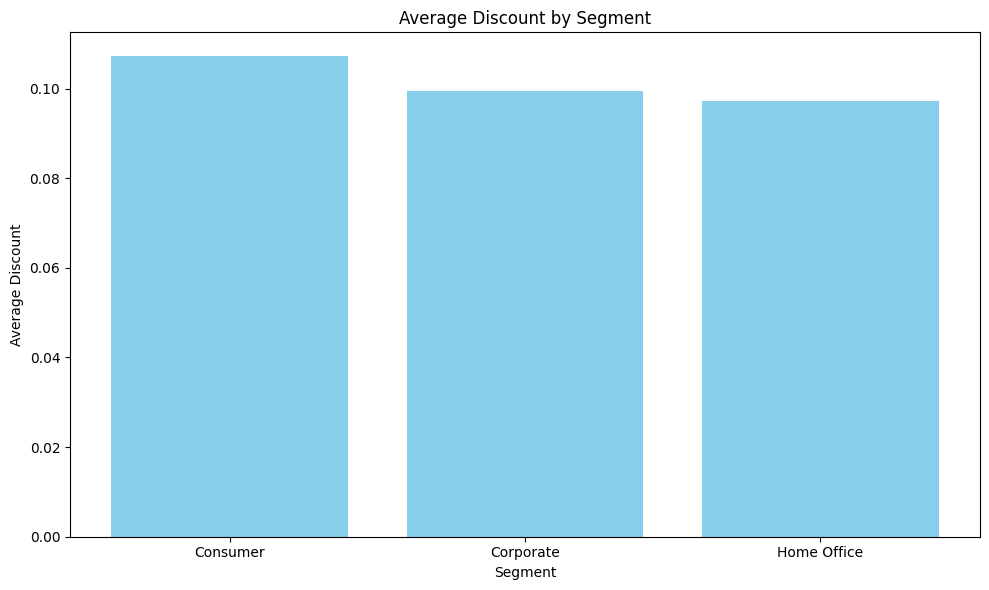

In [114]:
# Data
segments = result16['Segment']
avg_discounts = result16['avg_discount']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(segments, avg_discounts, color='skyblue')
plt.xlabel('Segment')
plt.ylabel('Average Discount')
plt.title('Average Discount by Segment')
plt.xticks()
plt.tight_layout()

# Show the plot
plt.show()

## Supply Chain and Inventory Management
* ### Query 17 is related to supply chain and inventory management. It calculates the inventory turnover rate for various products by counting the number of orders and summing the quantity sold for each product. This information is crucial for optimizing inventory levels and ensuring efficient supply chain operations.

In [115]:
# SQL Query 17 - Inventory Turnover Rate
query17 = """
SELECT
  "Product ID",
  "Product Name",
  "Category",
  "Sub-Category",
  COUNT(DISTINCT "Order ID") AS total_orders,
  SUM(Quantity) AS total_quantity
FROM df
GROUP BY   "Category", "Sub-Category";
"""
result17 = ps.sqldf(query17, locals())

print("\nQuery 17 - Inventory Turnover Rate\n")

result17


Query 17 - Inventory Turnover Rate



,Product ID,Product Name,Category,Sub-Category,total_orders,total_quantity
0,FUR-BO-10004620,"Safco Stackable Bookrack, Mobile",Furniture,Bookcases,453,1785
1,FUR-CH-10001153,"Harbour Creations Bag Chairs, Adjustable",Furniture,Chairs,445,1813
2,FUR-FU-10004608,"Advantus Door Stop, Erganomic",Furniture,Furnishings,438,1734
3,FUR-TA-10004544,"Chromcraft Coffee Table, Fully Assembled",Furniture,Tables,91,339
4,OFF-AP-10004512,"Hoover Stove, Red",Office Supplies,Appliances,307,1187
5,OFF-AR-10000505,"Binney & Smith Pens, Easy-Erase",Office Supplies,Art,1209,5394
6,OFF-BI-10001249,"Acco Hole Reinforcements, Recycled",Office Supplies,Binders,1121,5058
7,OFF-EN-10002065,"Ames Clasp Envelope, Set of 50",Office Supplies,Envelopes,418,1599
8,OFF-FA-10002393,"Accos Push Pins, Bulk Pack",Office Supplies,Fasteners,419,1597
9,OFF-LA-10001915,"Avery Legal Exhibit Labels, 5000 Label Set",Office Supplies,Labels,432,1730


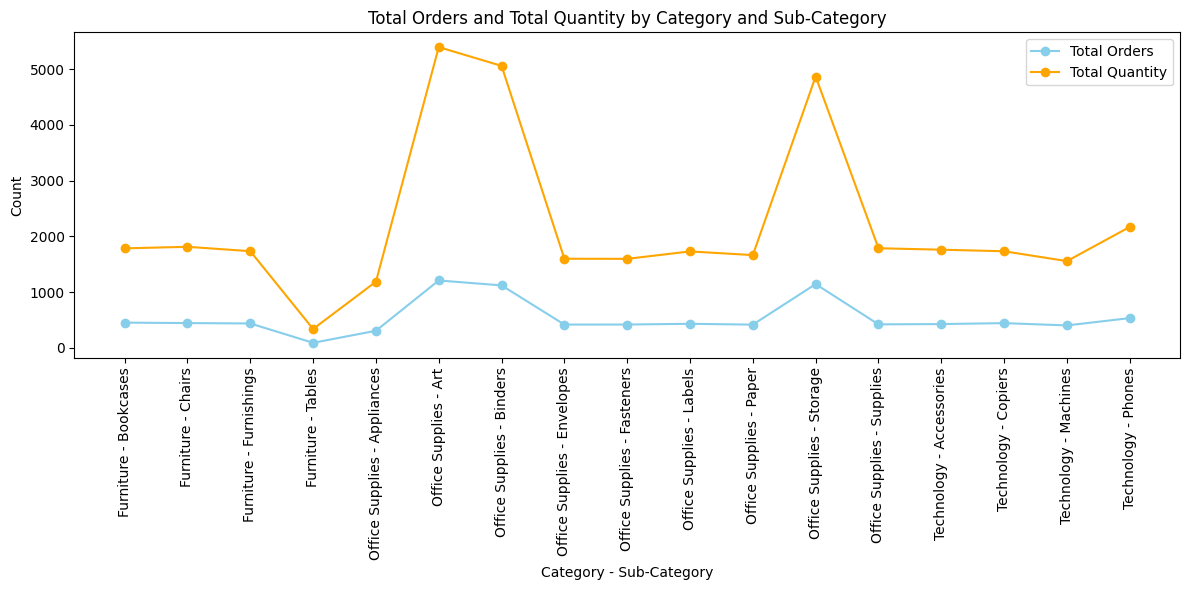

In [116]:
# Data
categories = result17['Category'] + ' - ' + result17['Sub-Category']
total_orders = result17['total_orders']
total_quantity = result17['total_quantity']

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(categories, total_orders, marker='o', label='Total Orders', color='skyblue')
plt.plot(categories, total_quantity, marker='o', label='Total Quantity', color='orange')
plt.xlabel('Category - Sub-Category')
plt.ylabel('Count')
plt.title('Total Orders and Total Quantity by Category and Sub-Category')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Geographical Analysis
* ### Query 18 provides insights into sales performance across different regions.
* ### Query 19 delves into the profitability of product categories and sub-categories in different regions. 
* ### Query 20 analyzes profitability at the state level. It calculates the total profit for each state and ranks them by descending profitability.

In [117]:
# SQL Query 18 - Sales by Region
query18 = """
SELECT
  "Region",
  "Country",
  SUM(Sales) AS total_sales
FROM df
GROUP BY "Region", "Country"
ORDER BY total_sales DESC;
"""
result18 = ps.sqldf(query18, locals())

print("\nQuery 18 - Sales by Region\n")

result18


Query 18 - Sales by Region



,Region,Country,total_sales
0,Central,France,858931.0830
1,Central,Germany,628840.0305
2,North,United Kingdom,528576.3000
3,South,Italy,289709.6580
4,South,Spain,287146.6800
5,Central,Austria,81162.0000
6,Central,Netherlands,77514.9450
7,Central,Belgium,49226.7000
8,North,Sweden,30491.4030
9,Central,Switzerland,24877.8600


In [118]:
# Create a DataFrame with region, country, and total sales
df_map = result18.copy()

# Create a bubble map
fig = px.scatter_geo(
    df_map,
    locations="Country",  # Use "Country" as the location field
    locationmode="country names",  # Specify location mode for country names
    color="Region",  # Color bubbles by region
    size="total_sales",  # Size of bubbles represents total sales
    hover_name="Country",  # Show country name on hover
    projection="natural earth",  # Choose a map projection
    title="Sales by Region and Country"
)

# Customize the map layout
fig.update_geos(
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="lightgray",
    showocean=True, oceancolor="lightblue",
    showcountries=True, countrycolor="Black"
)

# Show the map
fig.show()


In [119]:
# SQL Query 19 - Profitable Categories and Sub-Categories by Region
query19 = """
SELECT
  "Region",
  "Category",
  "Sub-Category",
  SUM(Profit) AS total_profit
FROM df
GROUP BY "Region", "Category", "Sub-Category"
ORDER BY "Region", total_profit DESC;
"""
result19 = ps.sqldf(query19, locals())

print("\nQuery 19 - Profitable Categories and Sub-Categories by Region\n")

result19


Query 19 - Profitable Categories and Sub-Categories by Region



,Region,Category,Sub-Category,total_profit
0,Central,Technology,Phones,50242.2120
1,Central,Technology,Copiers,47297.6760
2,Central,Furniture,Bookcases,46750.4220
3,Central,Furniture,Chairs,42601.2690
4,Central,Office Supplies,Storage,41068.0530
5,Central,Technology,Accessories,28327.0560
6,Central,Office Supplies,Appliances,27699.0540
7,Central,Technology,Machines,26308.2630
8,Central,Office Supplies,Art,24524.9280
9,Central,Furniture,Tables,19428.7515


In [120]:
# Create a DataFrame with region, category, sub-category, and total profit
df_treemap = result19.copy()

# Create a treemap
fig = px.treemap(
    df_treemap,
    path=["Region", "Category", "Sub-Category"],  # Define the hierarchy
    values="total_profit",  # Values to be represented by the treemap tiles
    color="total_profit",  # Color tiles by total profit
    color_continuous_scale="Viridis",  # Choose a color scale
    title="Profitable Categories and Sub-Categories by Region"
)

# Show the treemap
fig.show()

In [121]:
# SQL Query 20 - Profitability by State
query20 = """
SELECT
  "State",
  SUM(Profit) AS total_profit
FROM df
GROUP BY "State"
ORDER BY total_profit DESC;
"""
result20 = ps.sqldf(query20, locals())

print("\nQuery 20 - Profitability by State\n")



result20


Query 20 - Profitability by State



,State,total_profit
0,England,120824.0670
1,Ile-de-France,58964.9730
2,North Rhine-Westphalia,49534.5930
3,Provence-Alpes-Côte d'Azur,21513.0045
4,Lower Saxony,19710.0450
...,...,...
122,Central Jutland,29.5020
123,Extremadura,20.3520
124,St. Gallen,18.9300
125,Setúbal,11.0250


In [126]:
import statsmodels.api as sm

# Assuming 'Category' and 'Region' are non-numeric categorical columns
df = pd.get_dummies(df, columns=['Category', 'Region'], drop_first=True)

# Ensure the column names match the actual column names in your dataset
X = df[['Discount', 'Category_Office Supplies', 'Category_Technology', 'Region_England', 'Region_France', 'Region_Germany']]
y = df['Profit']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

KeyError: "None of [Index(['Category', 'Region'], dtype='object')] are in the [columns]"